<a href="https://colab.research.google.com/github/pragamarcos/data-science-proyecto-adiccion/blob/main/ProyectoDS_Praga.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

El presente trabajo tiene como objetivo explorar y analizar un conjunto de datos centrado en la adicción al celular en adolescentes, buscando comprender cómo el uso excesivo del dispositivo se vincula con variables emocionales, conductuales y académicas. A partir del dataset seleccionado, se plantean diversas preguntas e hipótesis orientadas a examinar las posibles relaciones entre el nivel de adicción al celular y factores como la ansiedad, la depresión, la autoestima, el rendimiento académico, las horas de sueño, el propósito del uso del teléfono y el entorno familiar. Se propone, por ejemplo, investigar si los adolescentes con mayor nivel de adicción presentan un menor rendimiento académico, mayores niveles de ansiedad y menos horas de sueño. Además, se evalúa si el tipo de uso del celular (redes sociales, juegos, educación) influye en el rendimiento escolar y en el bienestar emocional. También se plantea la hipótesis de que una mejor comunicación familiar puede estar asociada a un menor nivel de adicción. A través de visualizaciones univariadas, bivariadas y multivariadas, junto con resúmenes estadísticos, se busca dar respuesta a estas preguntas y contrastar las hipótesis planteadas. El análisis visual de los datos permitirá detectar patrones, correlaciones y posibles áreas de intervención para promover un uso más saludable del celular entre adolescentes. Este estudio se enmarca en la creciente preocupación por el impacto del entorno digital en la salud mental y el desempeño académico de las nuevas generaciones.



Vamos a comenzar importando el archivo para revisar la informacion con la que contamos y vamos a hacerlo desde el repositorio que cree en mi perfil de github:

In [23]:
import numpy as np
import pandas as pd

url = "https://raw.githubusercontent.com/pragamarcos/data-science-proyecto-adiccion/refs/heads/main/Adiccion_al_celular_dataset.csv"
df = pd.read_csv(url)
df.head()

,ID,Nombre,Edad,Género,Ubicación,Grado_escolar,Horas_de_uso_diario,Horas_de_sueño,Rendimiento_académico,Interacciones_sociales,...,Tiempo_antes_de_acostarse,Chequeos_del_celular_por_día,Aplicaciones_usadas_a_diario,Tiempo_en_redes_sociales,Tiempo_en_el_juego,Tiempo_en_Educación,Propósito_del_uso_del_teléfono,Comunicación_familiar,Horas_de_uso_en_finde,Nivel_de_adicción
0,1,Shannon Francis,13,Mujer,Hansonfort,9,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,busquedas,4,8.7,10.0
1,2,Scott Rodriguez,17,Mujer,Theodorefort,7,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,busquedas,2,5.3,10.0
2,3,Adrian Knox,13,Otro,Lindseystad,11,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Educación,6,5.7,9.2
3,4,Brittany Hamilton,18,Mujer,West Anthony,12,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Redes sociales,8,3.0,9.8
4,5,Steven Smith,14,Otro,Port Lindsaystad,9,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Juego,10,3.7,8.6


Vamos a revisar entnces un poco que informacion tiene y cuales son variables cualitativas y cuales cuantitativas:

In [24]:
df.columns

Index(['ID', 'Nombre', 'Edad', 'Género', 'Ubicación', 'Grado_escolar',
       'Horas_de_uso_diario', 'Horas_de_sueño', 'Rendimiento_académico',
       'Interacciones_sociales', 'Horas_de_ejercicio', 'Nivel_de_ansiedad',
       'Nivel_de_depresión', 'Autoestima', 'Control_parental',
       'Tiempo_antes_de_acostarse', 'Chequeos_del_celular_por_día',
       'Aplicaciones_usadas_a_diario', 'Tiempo_en_redes_sociales',
       'Tiempo_en_el_juego', 'Tiempo_en_Educación',
       'Propósito_del_uso_del_teléfono', 'Comunicación_familiar',
       'Horas_de_uso_en_finde', 'Nivel_de_adicción'],
      dtype='object')

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              3000 non-null   int64  
 1   Nombre                          3000 non-null   object 
 2   Edad                            3000 non-null   int64  
 3   Género                          3000 non-null   object 
 4   Ubicación                       3000 non-null   object 
 5   Grado_escolar                   3000 non-null   int64  
 6   Horas_de_uso_diario             3000 non-null   float64
 7   Horas_de_sueño                  3000 non-null   float64
 8   Rendimiento_académico           3000 non-null   int64  
 9   Interacciones_sociales          3000 non-null   int64  
 10  Horas_de_ejercicio              3000 non-null   float64
 11  Nivel_de_ansiedad               3000 non-null   int64  
 12  Nivel_de_depresión              30

Verificamos entonces que hacer en caso de que tengamos vacios N/A o nulos:

In [26]:
df.isnull().count()

,0
ID,3000
Nombre,3000
Edad,3000
Género,3000
Ubicación,3000
Grado_escolar,3000
Horas_de_uso_diario,3000
Horas_de_sueño,3000
Rendimiento_académico,3000
Interacciones_sociales,3000


Tambien chequeamos los datos estadisticos basicos para poder obtener un primer vistazo:

In [27]:
df.describe().T #Para verticalizar los resultados

,count,mean,std,min,25%,50%,75%,max
ID,3000.0,1500.500000,866.169729,1.0,750.75,1500.5,2250.25,3000.0
Edad,3000.0,15.969667,1.989489,13.0,14.00,16.0,18.00,19.0
Grado_escolar,3000.0,9.518667,1.715605,7.0,8.00,9.0,11.00,12.0
Horas_de_uso_diario,3000.0,5.020667,1.956501,0.0,3.70,5.0,6.40,11.5
Horas_de_sueño,3000.0,6.489767,1.490713,3.0,5.50,6.5,7.50,10.0
Rendimiento_académico,3000.0,74.947333,14.684156,50.0,62.00,75.0,88.00,100.0
Interacciones_sociales,3000.0,5.097667,3.139333,0.0,2.00,5.0,8.00,10.0
Horas_de_ejercicio,3000.0,1.040667,0.734620,0.0,0.50,1.0,1.50,4.0
Nivel_de_ansiedad,3000.0,5.590000,2.890678,1.0,3.00,6.0,8.00,10.0
Nivel_de_depresión,3000.0,5.460333,2.871557,1.0,3.00,5.0,8.00,10.0


Aca en el siguiente codigo vemos por suerte que el dataset fue curado por alguien antes de descargarlo de Kagle y por esto no tiene valores nulos.

In [28]:
Esnulo = df.isnull()
Filasnulas = Esnulo.any(axis=1)
Filasnulas2 = df[Filasnulas]
Filasnulas2

,ID,Nombre,Edad,Género,Ubicación,Grado_escolar,Horas_de_uso_diario,Horas_de_sueño,Rendimiento_académico,Interacciones_sociales,...,Tiempo_antes_de_acostarse,Chequeos_del_celular_por_día,Aplicaciones_usadas_a_diario,Tiempo_en_redes_sociales,Tiempo_en_el_juego,Tiempo_en_Educación,Propósito_del_uso_del_teléfono,Comunicación_familiar,Horas_de_uso_en_finde,Nivel_de_adicción


Importamos las librerias de graficos para poder trabajar con las relaciones entre ejes

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

In [30]:
Correlacion = df._get_numeric_data().corr()
Correlacion

,ID,Edad,Grado_escolar,Horas_de_uso_diario,Horas_de_sueño,Rendimiento_académico,Interacciones_sociales,Horas_de_ejercicio,Nivel_de_ansiedad,Nivel_de_depresión,...,Control_parental,Tiempo_antes_de_acostarse,Chequeos_del_celular_por_día,Aplicaciones_usadas_a_diario,Tiempo_en_redes_sociales,Tiempo_en_el_juego,Tiempo_en_Educación,Comunicación_familiar,Horas_de_uso_en_finde,Nivel_de_adicción
ID,1.000000,-0.035674,-0.001706,-0.004700,0.018254,-0.013589,-0.041130,0.001156,0.008810,0.004777,...,-0.024219,0.004300,-0.037117,-0.004608,0.017989,0.014501,-0.000726,-0.019269,0.018583,-0.007263
Edad,-0.035674,1.000000,0.007835,0.040689,0.014725,0.023481,-0.020240,0.001187,0.014651,0.052699,...,0.028212,0.007213,-0.008696,-0.003000,-0.005100,-0.008967,0.008372,-0.003813,0.002801,0.031306
Grado_escolar,-0.001706,0.007835,1.000000,-0.019139,-0.032462,0.035922,0.006131,-0.012852,-0.002490,-0.008615,...,0.002950,-0.006182,0.004399,0.013229,-0.015992,-0.018883,0.002784,0.019660,-0.011634,-0.005825
Horas_de_uso_diario,-0.004700,0.040689,-0.019139,1.000000,0.016444,0.021345,-0.030383,-0.005930,-0.007221,0.009672,...,0.000970,0.004935,0.004749,0.022841,-0.012620,-0.010371,0.014265,0.004427,0.019551,0.600771
Horas_de_sueño,0.018254,0.014725,-0.032462,0.016444,1.000000,-0.000273,-0.017898,0.006814,0.009836,-0.011518,...,0.005670,-0.004313,0.005198,0.026436,-0.018288,0.005798,-0.009756,-0.027040,-0.003670,-0.216681
Rendimiento_académico,-0.013589,0.023481,0.035922,0.021345,-0.000273,1.000000,0.011815,-0.002509,0.003427,-0.026509,...,0.003186,-0.005825,-0.017102,-0.026136,0.036357,-0.033734,0.016377,-0.027859,0.014263,0.012264
Interacciones_sociales,-0.041130,-0.020240,0.006131,-0.030383,-0.017898,0.011815,1.000000,0.005955,0.004341,0.024195,...,-0.023291,-0.019066,0.011992,-0.025440,0.002776,-0.004920,-0.008254,0.004239,-0.021410,-0.010631
Horas_de_ejercicio,0.001156,0.001187,-0.012852,-0.005930,0.006814,-0.002509,0.005955,1.000000,0.004525,-0.011770,...,0.020701,0.017109,-0.013038,-0.006264,-0.018977,-0.006999,0.017003,0.006452,0.039873,-0.021015
Nivel_de_ansiedad,0.008810,0.014651,-0.002490,-0.007221,0.009836,0.003427,0.004341,0.004525,1.000000,0.018607,...,-0.011530,-0.004732,0.017988,0.007416,-0.002736,0.014677,0.024640,0.011090,0.006720,0.016005
Nivel_de_depresión,0.004777,0.052699,-0.008615,0.009672,-0.011518,-0.026509,0.024195,-0.011770,0.018607,1.000000,...,0.014949,-0.028389,-0.001146,0.019049,0.001758,-0.008951,-0.028613,-0.012720,-0.005490,0.008491


como es muy dificil de detectar los mas cercanos en la matrriz vamos a seguir el ejemplo dado en clases para entenderlo a traves de un grafico de manera visual aplicando escala de colores

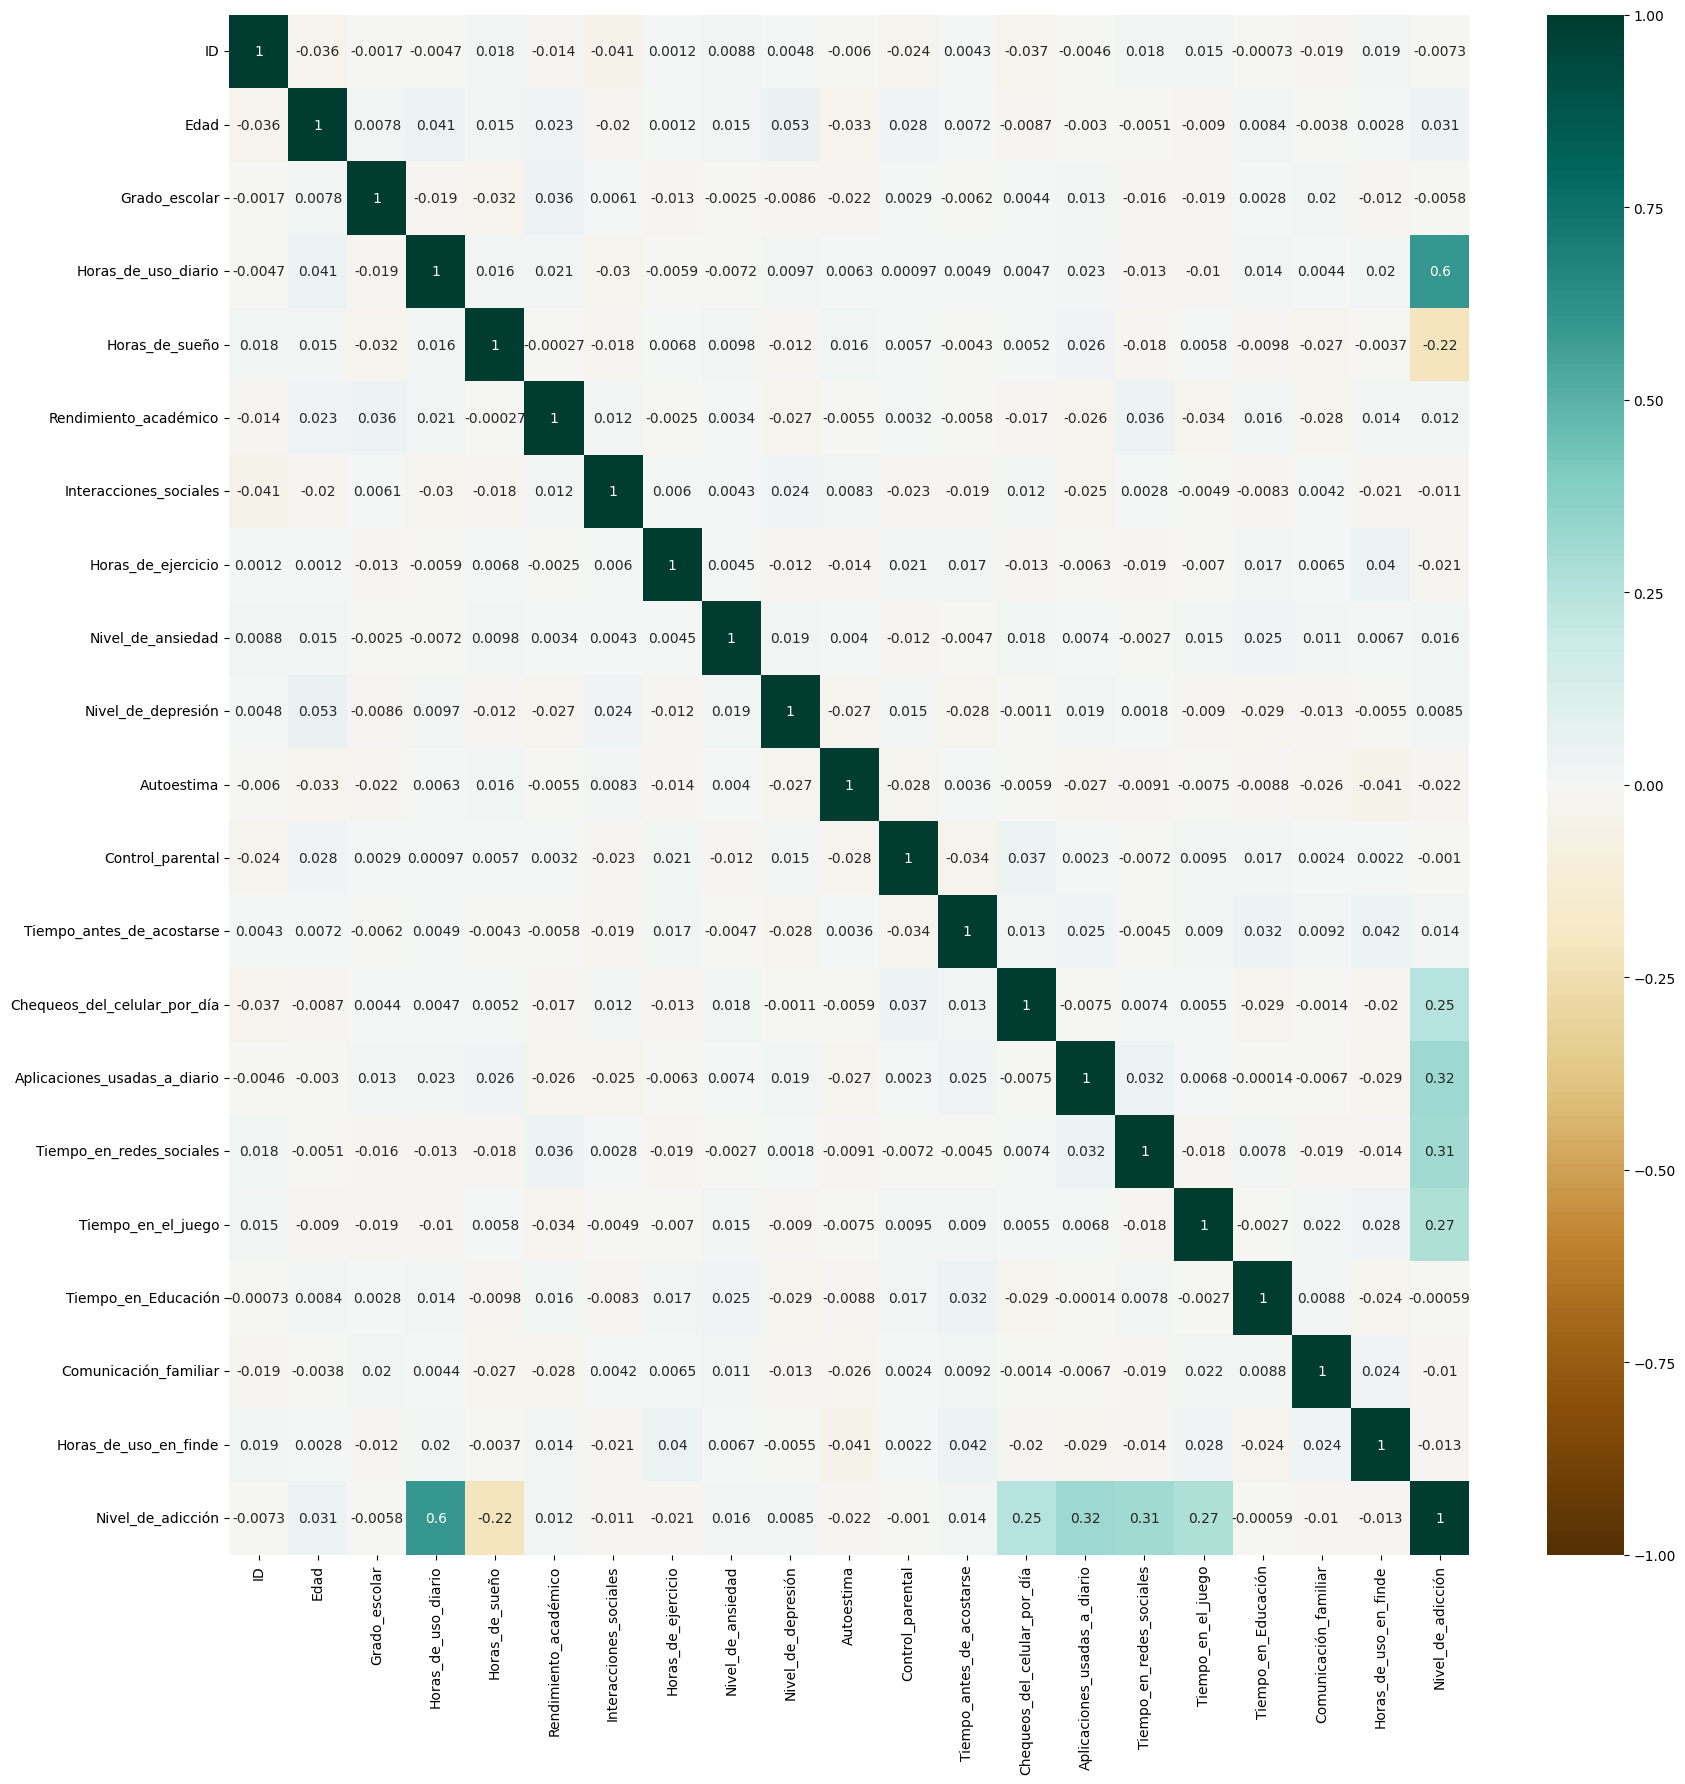

In [31]:
plt.figure(figsize=(20,20));
sns.heatmap(Correlacion, vmin=-1.0, vmax=1.0, center=0.0, annot=True, cmap='BrBG');

Entendemos entonces lo que suponemos desde un principio, que los chequeos del celular, sus horas de uso diarias y el tiempo en las redes sociales son variables estrechamente relacionadas con el nivel de adiccion, asi como de manera contraria y siguiendo una logica, mientras menos horas de sueño entonces mayor adiccion.

Vamos a proceder entonces a aislar la variable "nivel de adiccion" para poder segmentarla como variable objetivo y ademas para guardar los datos por si los necesitamos intactos mas adelante.

In [32]:
Eje_y = df.filter(['Nivel_de_adicción'])
Eje_y

,Nivel_de_adicción
0,10.0
1,10.0
2,9.2
3,9.8
4,8.6
...,...
2995,9.8
2996,5.5
2997,6.2
2998,10.0


Vamos a continuar el analisis ingresando un grafico boxplot para poder entender visualmente la relacion que tiene el uso de redes sociales con el nivel academico en los tres generos para ver si esclarece algun tipo de informacion:

---



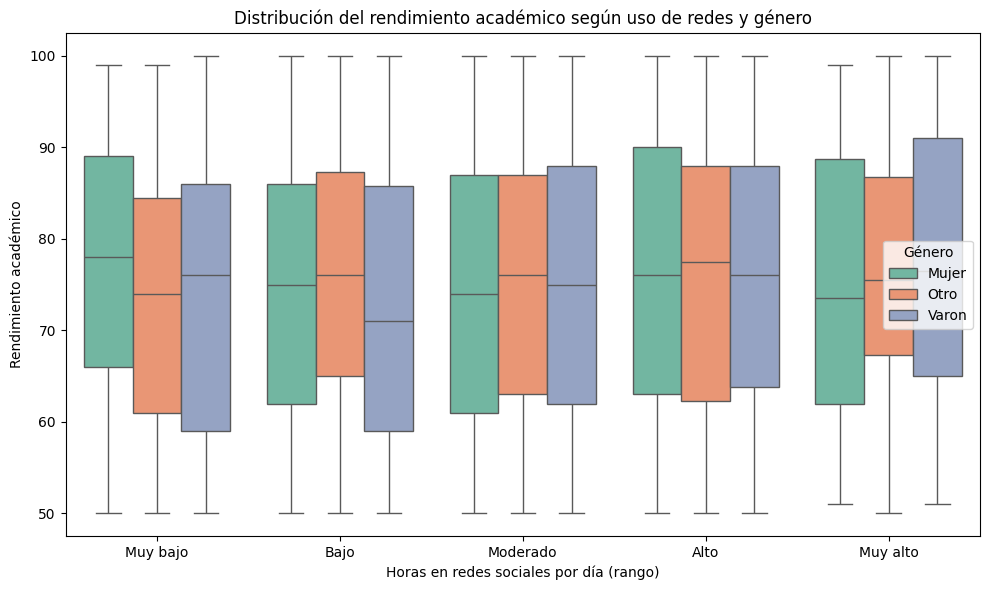

In [33]:
df["Rango_uso_redes"] = pd.cut(df["Tiempo_en_redes_sociales"],
                               bins=[0, 1, 2, 3, 4, 5],
                               labels=["Muy bajo", "Bajo", "Moderado", "Alto", "Muy alto"],
                               right=False) # Establecer right=False para incluir el límite izquierdo

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Rango_uso_redes", y="Rendimiento_académico", hue="Género", palette="Set2")
plt.title("Distribución del rendimiento académico según uso de redes y género")
plt.xlabel("Horas en redes sociales por día (rango)")
plt.ylabel("Rendimiento académico")
plt.legend(title="Género")
plt.tight_layout()
plt.show()


En el análisis realizado, no se encontró una relación clara y consistente entre el tiempo dedicado a redes sociales y el rendimiento académico. Si bien se aprecia una ligera tendencia a un menor rendimiento en los grupos de uso más intensivo, la dispersión de los datos sugiere que la relación no es concluyente. Tampoco se evidenciaron diferencias significativas por género. Esto sugiere que, en este conjunto de datos, otros factores podrían estar influyendo más directamente que el uso de redes sociales por sí solo.

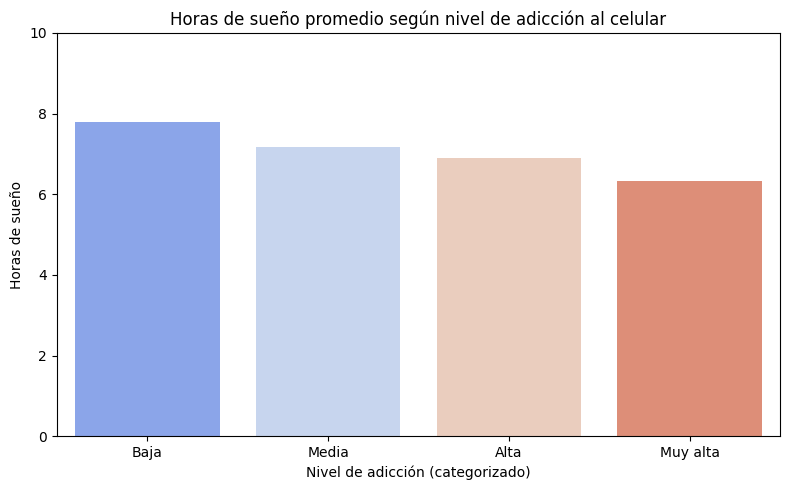

In [34]:
df["Adicción_categoria"] = pd.cut(df["Nivel_de_adicción"],
                                  bins=[0, 3, 6, 8, 10],
                                  labels=["Baja", "Media", "Alta", "Muy alta"])

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x="Adicción_categoria", y="Horas_de_sueño", hue="Adicción_categoria", palette="coolwarm", errorbar=None, legend=False)

plt.title("Horas de sueño promedio según nivel de adicción al celular")
plt.xlabel("Nivel de adicción (categorizado)")
plt.ylabel("Horas de sueño")
plt.ylim(0, 10)
plt.tight_layout()
plt.show()

Una vez categorizados los niveles de adiccion podemos deducir que una mayor adiccion implica menor cantidad de horas de sueño. Vamos a sumar entonces una variable mas para poder entender el rendimiento academico en relacion con lo analizado hasta ahora.

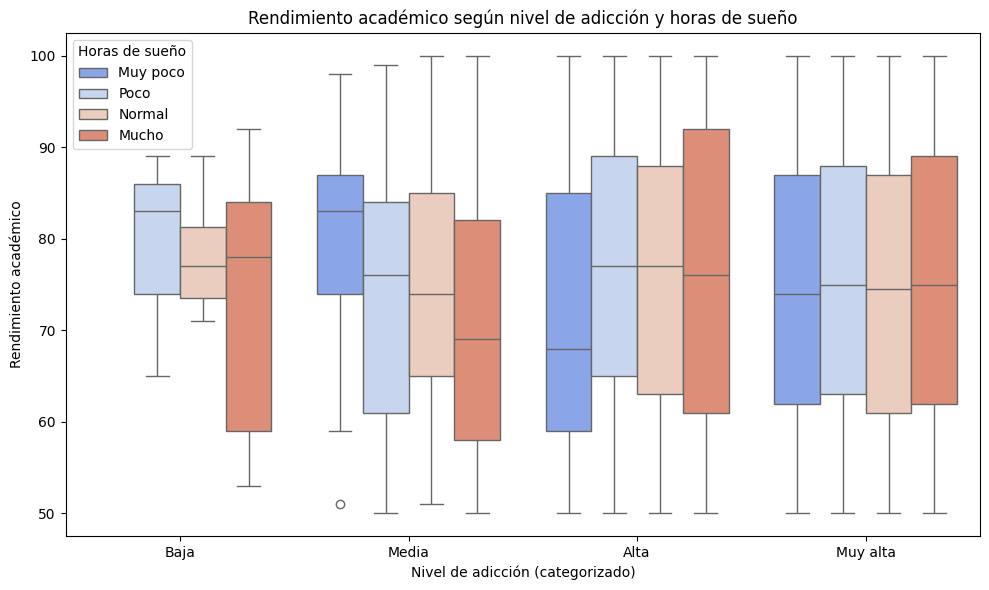

In [35]:
df["Sueño_categoria"] = pd.cut(df["Horas_de_sueño"],
                               bins=[0, 5, 6.5, 8, 10],
                               labels=["Muy poco", "Poco", "Normal", "Mucho"])

plt.figure(figsize=(10,6))
sns.boxplot(data=df, x="Adicción_categoria", y="Rendimiento_académico", hue="Sueño_categoria", palette="coolwarm")

plt.title("Rendimiento académico según nivel de adicción y horas de sueño")
plt.xlabel("Nivel de adicción (categorizado)")
plt.ylabel("Rendimiento académico")
plt.legend(title="Horas de sueño")
plt.tight_layout()
plt.show()

Se observa una tendencia general en la cual a mayor nivel de adicción al celular, el rendimiento académico tiende a disminuir. Esta relación se acentúa entre quienes además duermen menos, lo que refuerza la idea de que el uso excesivo del celular puede estar vinculado a un descanso insuficiente y, en consecuencia, a un menor rendimiento académico.

Sin embargo, al observar más detenidamente la categoría de baja adicción, surge un hallazgo interesante: en este grupo no se registran casos con horas de sueño muy escasas, lo que sugiere que un menor uso del celular podría estar asociado a mejores hábitos de sueño. A su vez, dentro de esta misma categoría, se destaca que quienes duermen poco (aunque no muy poco) presentan una mediana de rendimiento académico superior a quienes duermen mucho. Este comportamiento atípico podría deberse a estudiantes que reducen voluntariamente sus horas de sueño por estudiar más, lo que mejora su rendimiento, aunque no necesariamente sea un hábito saludable o sostenible.

En conjunto, los datos refuerzan la hipótesis de que la adicción al celular y el descanso insuficiente son factores que, combinados, impactan negativamente en el desempeño académico. No obstante, también evidencian que estas relaciones no son lineales ni absolutas, y que existen casos particulares que merecen ser estudiados con mayor profundidad.

Veamos entonces la relacion entre el uso del celular y las variables emocionales y psicologicas que tiene el dataset a traves de un grafico:

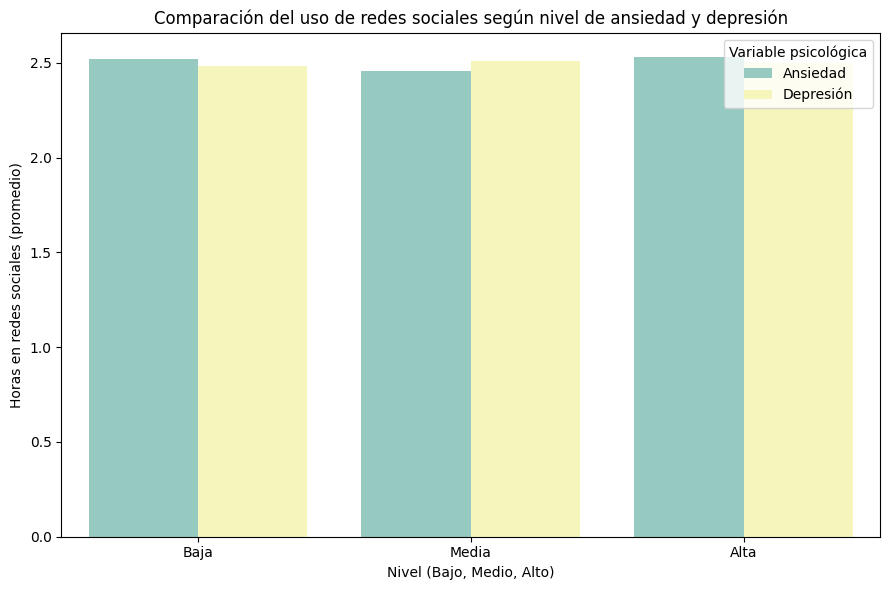

In [36]:

# Creamos categorías de ansiedad y depresión
df["Ansiedad_cat"] = pd.cut(df["Nivel_de_ansiedad"], bins=[-0.1, 3, 7, 10], labels=["Baja", "Media", "Alta"])
df["Depresion_cat"] = pd.cut(df["Nivel_de_depresión"], bins=[-0.1, 3, 7, 10], labels=["Baja", "Media", "Alta"])

# Creamos copia de las variables relacionadas a redes sociales
ansiedad_redes = df[["Tiempo_en_redes_sociales", "Ansiedad_cat"]].copy()
ansiedad_redes["Tipo"] = "Ansiedad"
ansiedad_redes.rename(columns={"Ansiedad_cat": "Nivel"}, inplace=True)

depresion_redes = df[["Tiempo_en_redes_sociales", "Depresion_cat"]].copy()
depresion_redes["Tipo"] = "Depresión"
depresion_redes.rename(columns={"Depresion_cat": "Nivel"}, inplace=True)

# Unimos ambos en un solo dataframe
comparativo_redes = pd.concat([ansiedad_redes, depresion_redes])

plt.figure(figsize=(9, 6))
sns.barplot(data=comparativo_redes,
            x="Nivel",
            y="Tiempo_en_redes_sociales",
            hue="Tipo",
            palette="Set3",
            errorbar=None)

plt.title("Comparación del uso de redes sociales según nivel de ansiedad y depresión")
plt.xlabel("Nivel (Bajo, Medio, Alto)")
plt.ylabel("Horas en redes sociales (promedio)")
plt.legend(title="Variable psicológica")
plt.tight_layout()
plt.show()


Deducimos entonces que en estos casos tampoco hay una relacion directa de las principales variables psicologicas con las horas en redes sociales ni en menor ni en mayor proporcion.

Procedemos entonces a crear y entrenar el primero de los modelos en el que intentaremos predecir, usando todas las variables utiles, el nivel de adiccion. Inicialmente y no perdiendo de vista que la variable objetivo es un numero, creo que puede funcionar mejor un modelo de regresion ya que, como podemos ver en la celda 10, el resultado es un float que tiene numeros entremedio y no solo enteros del 1 al 10. Comenzamos con un modelo de regresion lineal para ver y medir los resultados:

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Separamos variables predictoras y variable objetivo
features = [
    "Edad",
    "Género",
    "Ubicación",
    "Grado_escolar",
    "Horas_de_uso_diario",
    "Horas_de_sueño",
    "Rendimiento_académico",
    "Interacciones_sociales",
    "Horas_de_ejercicio",
    "Nivel_de_ansiedad",
    "Nivel_de_depresión",
    "Autoestima",
    "Control_parental",
    "Tiempo_antes_de_acostarse",
    "Chequeos_del_celular_por_día",
    "Aplicaciones_usadas_a_diario",
    "Tiempo_en_redes_sociales",
    "Tiempo_en_el_juego",
    "Tiempo_en_Educación",
    "Propósito_del_uso_del_teléfono",
    "Comunicación_familiar",
    "Horas_de_uso_en_finde"
]
X = df[features]
y = df["Nivel_de_adicción"]


# convertimos las variables categoricas a numéricas
X = pd.get_dummies(X, drop_first=True)

# Dividimos el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Hacemos predicciones
y_pred = model.predict(X_test)

# Evaluamos el resultado
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Error cuadrático medio (MSE): {mse:.2f}")
print(f"Coeficiente de determinación (R²): {r2:.2f}")

Error cuadrático medio (MSE): 2.18
Coeficiente de determinación (R²): 0.13


vemos que la regresion lineal no nos da un buen resultado por lo que vamos a proceder a intentar un random forest  para ver el resultado:

In [38]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

features = [
    "Edad",
    "Género",
    "Ubicación",
    "Grado_escolar",
    "Horas_de_uso_diario",
    "Horas_de_sueño",
    "Rendimiento_académico",
    "Interacciones_sociales",
    "Horas_de_ejercicio",
    "Nivel_de_ansiedad",
    "Nivel_de_depresión",
    "Autoestima",
    "Control_parental",
    "Tiempo_antes_de_acostarse",
    "Chequeos_del_celular_por_día",
    "Aplicaciones_usadas_a_diario",
    "Tiempo_en_redes_sociales",
    "Tiempo_en_el_juego",
    "Tiempo_en_Educación",
    "Propósito_del_uso_del_teléfono",
    "Comunicación_familiar",
    "Horas_de_uso_en_finde"
]
X = df[features]
y = df['Nivel_de_adicción']

# Codificar categóricas
X = pd.get_dummies(X, drop_first=True)

# Dividir datos
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Entrenar modelo ajustado
rf_model = RandomForestRegressor(
    n_estimators=500,
    max_depth=None,
    max_features='sqrt',
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)

# Evaluar resultados
y_pred = rf_model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"R² del modelo ajustado: {r2:.4f}")



R² del modelo ajustado: 0.5346


Dado que el R² actual se encuentra tambien lejos de 1, utilizamos este valor como referencia para optimizarlo y asi ver si logramos acercarnos mas a 0.9 en el R². Para mejorar su desempeño, emplearemos lightgbm, un modelo basado, asegurando que las variables categóricas continúen siendo convertidas a formato numérico mediante get_dummies:

In [39]:
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


# Separar variables predictoras y variable objetivo
features = [
    "Edad",
    "Género",
    "Grado_escolar",
    "Horas_de_uso_diario",
    "Horas_de_sueño",
    "Rendimiento_académico",
    "Interacciones_sociales",
    "Horas_de_ejercicio",
    "Nivel_de_ansiedad",
    "Nivel_de_depresión",
    "Autoestima",
    "Control_parental",
    "Tiempo_antes_de_acostarse",
    "Chequeos_del_celular_por_día",
    "Aplicaciones_usadas_a_diario",
    "Tiempo_en_redes_sociales",
    "Tiempo_en_el_juego",
    "Tiempo_en_Educación",
    "Propósito_del_uso_del_teléfono",
    "Comunicación_familiar",
    "Horas_de_uso_en_finde"
]
X = df[features]
y = df['Nivel_de_adicción']

# convertimos las variables categoricas a numéricas
X = pd.get_dummies(X, drop_first=True)


# Dividir el dataset en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenamos un modelo LightGBM
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    learning_rate=0.05,
    max_depth=-1,
    n_estimators=1000,
    num_leaves=50,
    reg_alpha=0.0,
    reg_lambda=0.1,
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluamos el resultado
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MSE del modelo LightGBM: {mse_lgb:.4f}")
print(f"R² del modelo LightGBM: {r2_lgb:.4f}")

MSE del modelo LightGBM: 0.1405
R² del modelo LightGBM: 0.9442


Revisamos entonces en el resultado y cuales son las variables mas significativas y utilizadas por el modelo:

In [40]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print(feature_importances)

                                          feature  importance
2                             Horas_de_uso_diario        6567
14                       Tiempo_en_redes_sociales        5399
12                   Chequeos_del_celular_por_día        4358
3                                  Horas_de_sueño        3934
18                          Horas_de_uso_en_finde        3866
15                             Tiempo_en_el_juego        3522
4                           Rendimiento_académico        2533
13                   Aplicaciones_usadas_a_diario        2520
6                              Horas_de_ejercicio        2042
11                      Tiempo_antes_de_acostarse        1878
16                            Tiempo_en_Educación        1861
17                          Comunicación_familiar        1455
5                          Interacciones_sociales        1404
7                               Nivel_de_ansiedad        1398
8                              Nivel_de_depresión        1387
9       

Viendo que tenemos un buen resultado vamos a ajustar algunos hiperparametros para ver si podemos ajustar el resultado aun más, creando 3 variables nuevas que fuerce el relacionamiento de algunas que por si solas no ayudan necesariamente al entrenamiento:

In [41]:
df['uso_vs_sueño'] = df['Horas_de_uso_diario'] / (df['Horas_de_sueño'] + 1)
df['ansiedad_x_uso'] = df['Nivel_de_ansiedad'] * df['Horas_de_uso_diario']
df['autoestima_x_redes'] = df['Autoestima'] * df['Tiempo_en_redes_sociales']
features = [
    "Edad",
    "Género",
    "Grado_escolar",
    "Horas_de_uso_diario",
    "Horas_de_sueño",
    "Rendimiento_académico",
    "Interacciones_sociales",
    "Horas_de_ejercicio",
    "Nivel_de_ansiedad",
    "Nivel_de_depresión",
    "Autoestima",
    "Control_parental",
    "Tiempo_antes_de_acostarse",
    "Chequeos_del_celular_por_día",
    "Aplicaciones_usadas_a_diario",
    "Tiempo_en_redes_sociales",
    "Tiempo_en_el_juego",
    "Tiempo_en_Educación",
    "Propósito_del_uso_del_teléfono",
    "Comunicación_familiar",
    "Horas_de_uso_en_finde"
]
X = df[features + ['uso_vs_sueño', 'ansiedad_x_uso', 'autoestima_x_redes']]
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar un modelo LightGBM
lgb_model = lgb.LGBMRegressor(
    random_state=42,
    learning_rate=0.05,
    max_depth=-1,
    n_estimators=1000,
    num_leaves=100,
    reg_alpha=0.0,
    reg_lambda=0.1,
    verbose=-1
)
lgb_model.fit(X_train, y_train)

# Hacemos predicciones
y_pred_lgb = lgb_model.predict(X_test)

# Evaluamos el resultado
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
r2_lgb = r2_score(y_test, y_pred_lgb)

print(f"MSE del modelo LightGBM: {mse_lgb:.4f}")
print(f"R² del modelo LightGBM: {r2_lgb:.4f}")
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"RMSE del modelo: {rmse:.2f}")



MSE del modelo LightGBM: 0.1372
R² del modelo LightGBM: 0.9455
RMSE del modelo: 1.08


A pesar del resultado excelente que logramos entrenando el modelo, tanto con MSE como de R2, vamos a revisar si las nuevas features que creamos ayudan realmente al entrenamiento real del modelo ordenandolas desde la mas a la menos importante:

In [42]:
feature_importances = pd.DataFrame({
    'feature': X_train.columns,
    'importance': lgb_model.feature_importances_
}).sort_values(by='importance', ascending=False)
print(feature_importances)

                                          feature  importance
14                       Tiempo_en_redes_sociales        8457
19                                   uso_vs_sueño        7915
20                                 ansiedad_x_uso        6959
15                             Tiempo_en_el_juego        6953
12                   Chequeos_del_celular_por_día        6947
21                             autoestima_x_redes        6843
2                             Horas_de_uso_diario        5669
18                          Horas_de_uso_en_finde        4891
3                                  Horas_de_sueño        4383
13                   Aplicaciones_usadas_a_diario        4320
4                           Rendimiento_académico        4044
11                      Tiempo_antes_de_acostarse        3881
6                              Horas_de_ejercicio        3275
16                            Tiempo_en_Educación        2882
8                              Nivel_de_depresión        2400
17      

Podemos entender en base a esto que las nuevas features que creamos ayudan al entrenamiento ya que entran en el Top 5 de las mas importantes dentro de la lista.


Hacemos entonces un grafico para revisar los valores residuales que pueden estar sesgando el resultado del entrenamiento:

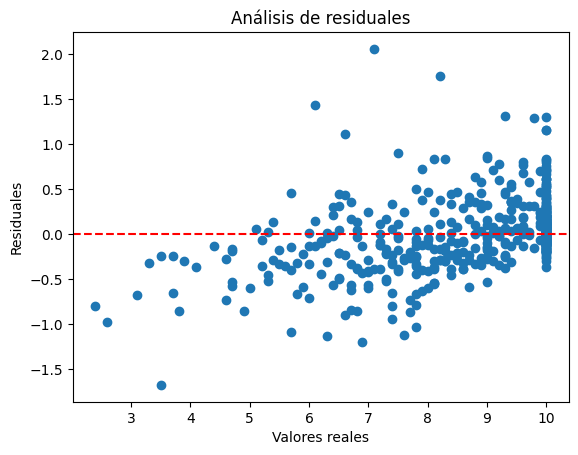

In [43]:
import matplotlib.pyplot as plt

residuales = y_test - y_pred_lgb
plt.scatter(y_test, residuales)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valores reales")
plt.ylabel("Residuales")
plt.title("Análisis de residuales")
plt.show()




Definitivamente el mejor de los modelos (a pesar de lo que se creia inicialmente) es un modelo de regresion y el lightGBM es el que mejores resultados nos devuelve teniendo en cuenta las metricas de analisis y ajustandolo creando las nuevas features. A pesar de todo esto vemos que continuamos teniendo ruido sobre todo cuando el nivel de adiccion es mas alto por lo que podemos concluir que a mayor nivel de adiccion mas dificil se hace para el modelo predecir uniendo las variables que le damos.


**Evaluación del modelo final**

El modelo LightGBM explica la mayor parte de la variabilidad del puntaje de adicción.

Se verificó la estabilidad de resultados en el conjunto de prueba.

Se recomienda utilizar este modelo para predicciones futuras o estudios complementarios.

Conclusiones

El nivel de adicción al celular está fuertemente asociado con factores emocionales y hábitos de uso.

LightGBM ofrece una herramienta robusta para predecir este puntaje y priorizar intervenciones.